# Springboard Data Science Project - Capstone 2 

### Predicting Hotel Cancellation and Price¶


# Data Wrangling <a id='1_Data_Wrangling'></a>

Goal: Organize your data to streamline the next steps of your capstone

## Table of Contents<a id='1.1_Table of Contents'></a>

* [1 Data wrangling](#Data_wrangling)
  * [1.1 Table of Contents](#Table_of_Contents)
  * [1.2 Objectives](#Objectives)
      * [1.2.1 Background](#Background)
      * [1.2.2 Data Source](#Data Source)
  * [1.3 Imports](#Imports)
  * [1.4 Load Data](#Load_Data)
  * [1.5 Data Exploration and Data Cleaning](#Data_Exploration_and_Data_Cleaning)
  * [1.6 Save Data](#Save_Data)
  

## Objectives<a id='1.2_Objectives'></a>

Developing a model to predict who is going to cancel their booking to help the tourism industry.  Develop a model to predict the hotel price considering other multiple factors.


#### Background<a id='1.2.1_Background'></a>

Hotel cancellation is one of the biggest challenges to control in tourism industry. A lot of hotels let you cancel within 24 hours notice. Some hotels have a no refund policy however, still many hotels authorize customers to cancel within certain period time notice at a rated penalty or without a penalty. This is a good customer service which can help the customers to plan out their trips more reliably however, there is a risky factor for hotels. Therefore, predicting the actual demand and price can help to reduce the unexpected profit loss. This can help the industry by reducing the unexpected risk, as well as ready with enough facilities.

#### Data Source<a id='1.2.2_Data_Source'></a>
https://www.kaggle.com/jessemostipak/hotel-booking-demand 

Features

* **hotel**: Resort Hotel or City Hotel
* **is_canceled**: Value indicating if the booking was canceled (1) or not (0)
* **lead_time**: Number of days between the booking date to the arrival date
* **arrival_date_year**: Year of arrival
* **arrival_date_month**: Month of arrival
* **arrival_date_week_number**: Week number according to year of arrival
* **arrival_date_day_of_month**: Day of arrival
* **stays_in_weekend_nights**: Number of weekend nights booked (Saturday or Sunday)
* **stays_in_week_nights**: Number of week nights booked (Monday to Friday)
* **adults**: Number of adults
* **children**: Number of children
* **babies**: Number of babies
* **meal**: Type of meal booked
* **country**: Country of origin
* **market_segment**: Market segment designation, typically influences the price sensitivity
* **distribution_channel**: Booking distribution channel, refers to how the booking was made
* **is_repeated_guest**: Value indication if the booking was from a repeated guest (1) or not (0)
* **previous_cancellations**: Number of previous cancellations prior to current booking
* **previous_bookings_not_canceled**: Number of previous booking not canceled prior to current booking
* **reserved_room_type**: Code of room type reserved
* **assigned_room_type**: Code for the type of room assigned to the booking
* **booking_changes**: Number of changes made to the booking since entering the hotel management system
* **deposit_type**: Type of deposit made for the reservation
* **agent**: ID of the travel agency that made the booking
* **company**: ID of the company/organization that made the booking or is responsible for payment
* **days_in_waiting_list**: Number of days booking was in the waiting list until it was confirmed
* **customer_type**: Type of booking
* **adr**: Average Daily Rate (the sum of transactions divided by the number of nights stayed)
* **required_car_parking_spaces**: Number of car parking spaces requested
* **total_of_special_requests**: Number of special requests made by the customer
* **reservation_status**: Last reservation status (Canceled, Check-Out, No-Show)
* **reservation_status_date**: Date at which the last status was set

## Imports<a id='1.3_Imports'></a>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Load Data<a id='1.4_Load Data'></a>

In [2]:
# Loading the dataset

df = pd.read_csv('../raw_data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date'],
      dtype='object')

In [3]:
df.shape

(119390, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Exploration and Data Cleaning<a id='1.5_Data Exploration and Data Cleaning'></a>

In [5]:
# Converting the object datatype to datetime datatype

df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [6]:
# Creating a new column by combining the year, month, day of arrival date together

df['arrival_date'] = pd.to_datetime(df.arrival_date_year.astype(str)+'/'+df.arrival_date_month.astype(str)+'/'+df.arrival_date_day_of_month.astype(str))

In [7]:
df['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 119390, dtype: datetime64[ns]

In [8]:
# Remove unwanted columns 

df = df.drop(columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'])

In [9]:
df.shape

(119390, 30)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119386 non-null  float64       
 8   babies                          119390 non-null  int64         
 9   meal                            119390 non-null  object        
 10  country                         118902 non-null  object 

In [11]:
# To find the number of missing values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_week_number               0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr             

In [12]:
# Percentage of missing values

(df.isnull().sum()/len(df))*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_week_number           0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                             13.686238
company                           94.306893
days_in_waiting_list            

In [13]:
# Dropping a column with more than half missing values

df=df.drop(columns = 'company')

In [14]:
# Correcting missing values 

df['agent']=df['agent'].fillna('not third party')

In [15]:
df['agent']=df['agent'].astype(str)

In [16]:
print(df['agent'])

0         not third party
1         not third party
2         not third party
3                   304.0
4                   240.0
               ...       
119385              394.0
119386                9.0
119387                9.0
119388               89.0
119389                9.0
Name: agent, Length: 119390, dtype: object


In [17]:
df['country']=df['country'].fillna('not available')

In [18]:
print(df['country'])

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object


In [19]:
print(df['children'].mean())

0.10388990333874994


In [20]:
# majority children values are zero

df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [21]:
df['children'].fillna(0.0)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119385    0.0
119386    0.0
119387    0.0
119388    0.0
119389    0.0
Name: children, Length: 119390, dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_week_number        119390 non-null  int64         
 4   stays_in_weekend_nights         119390 non-null  int64         
 5   stays_in_week_nights            119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   children                        119386 non-null  float64       
 8   babies                          119390 non-null  int64         
 9   meal                            119390 non-null  object        
 10  country                         119390 non-null  object 

In [23]:
df.shape

(119390, 29)

In [24]:
# Zero Average daily rate doesn't make sense. 
# There are about 1.64% zero adr in the data. I wasn't able to find the meaning of zero ADR, 
# and the volume is not large compared to the whole dataset so decided to drop zero values. 


adr0 = df[df['adr']==0]
print('Number of zero average daily rate:', adr0['adr'].count())
print('Percentile of number of zero ADR in the hotel dataset:', (adr0['adr'].count()/len(df['adr']))*100, '%')

adr0_cancel = adr0[adr0['is_canceled']==1]
print('Number of cancelled booking zero ADR:', adr0_cancel['is_canceled'].count())
print('Percentile of cancelled booking zero ADR out of total number of zero ADR:', (213/1959)*100,'%')

Number of zero average daily rate: 1959
Percentile of number of zero ADR in the hotel dataset: 1.640840941452383 %
Number of cancelled booking zero ADR: 213
Percentile of cancelled booking zero ADR out of total number of zero ADR: 10.872894333843798 %


In [25]:
# Dropping zero values in ADR

df = df[df['adr']!=0]

In [26]:
df.shape

(117431, 29)

(array([1.1743e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  -6.38 ,  534.258, 1074.896, 1615.534, 2156.172, 2696.81 ,
        3237.448, 3778.086, 4318.724, 4859.362, 5400.   ]),
 <BarContainer object of 10 artists>)

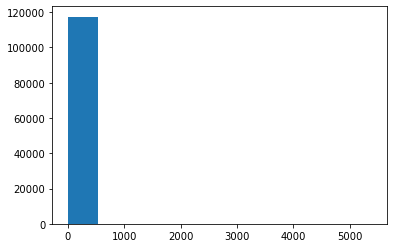

In [27]:
# Observed outliers in ADR 

plt.hist([df['adr']])

In [28]:
# ADR price greater than 1000, there is one value which looks like an outlier

df[df.adr > 1000]['adr']

48515    5400.0
Name: adr, dtype: float64

In [29]:
# Dropping an outlier 

df = df[df.adr<1000]

In [30]:
df.shape

(117430, 29)

## Save Data<a id='1.6_Save_Data'></a>

In [31]:
# Save the data to a new csv file

df.to_csv('../data/hotel_data_cleaned.csv')